## EXPLORATORY DATA ANALYSIS - TITANIC DATASET

#### Import the Libraries:

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load and Explore the Dataset:

In [41]:
titanic = sns.load_dataset('titanic')

In [42]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


####  Basic Dataset Exploration:

In [43]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [44]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### Data Cleaning:

In [46]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic.dropna(subset=['embarked'], inplace=True)

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

titanic.drop(columns=['deck'], inplace=True)

In [47]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

#### Converting categorical variables to numerical values:

In [48]:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [49]:
titanic[['sex','embarked']].head()


,sex,embarked
0,0,2
1,1,0
2,1,2
3,1,2
4,0,2


##### # Dropping the non-numeric columns for correlation matrix

In [50]:
numeric_titanic = titanic.select_dtypes(include=['float64', 'int64'])

#### Data Visualization:

#### Distribution of Age

The distribution of age helps us understand the age range of the passengers on the Titanic.

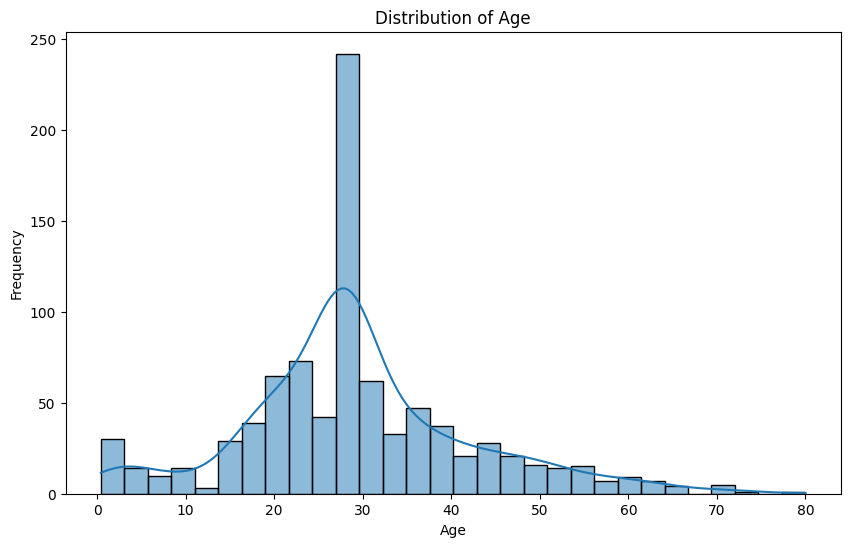

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

-> The age distribution shows that the majority of passengers were between 20 and 40 years old. There are fewer children and elderly passengers.

#### Survival Rate by Sex

This bar plot shows the survival rates for males and females.

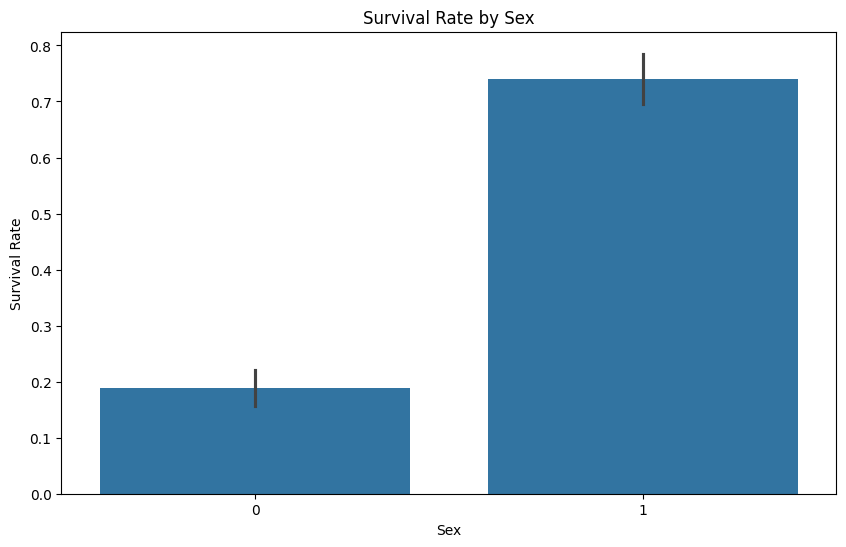

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

-> Females had a significantly higher survival rate compared to males.

### Survival Rate by Class

This bar plot shows the survival rates for different passenger classes.

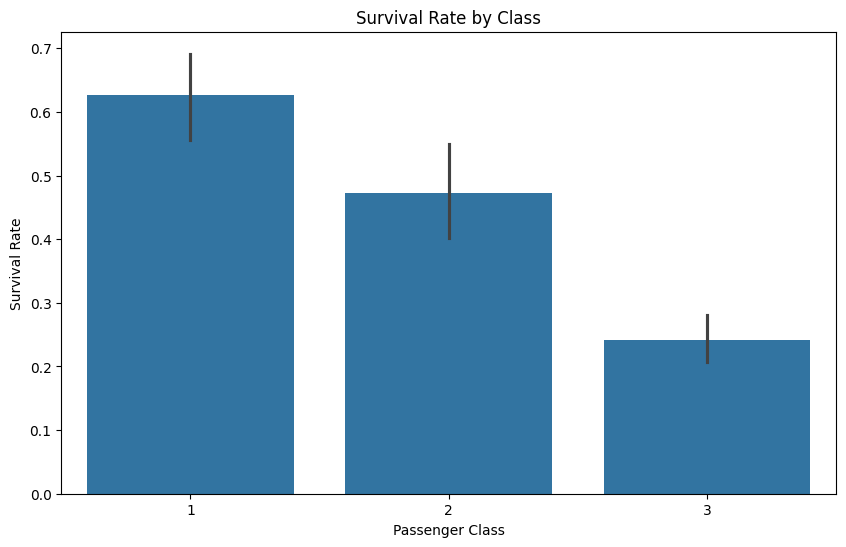

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

-> Passengers in the first class had the highest survival rate, followed by those in second class. Third-class passengers had the lowest survival rate.

#### Survival Rate by Age Group

This histogram shows the survival rates across different age groups.

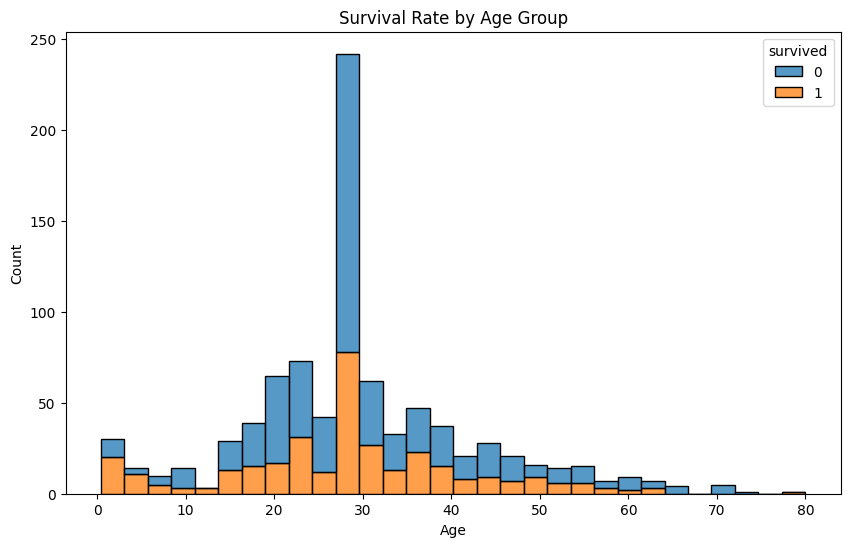

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='age', hue='survived', multiple='stack', bins=30)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

-> Children (age < 16) had a higher survival rate compared to adults and elderly passengers.

#### Fare Distribution by Class

This box plot shows the fare distribution across different passenger classes.

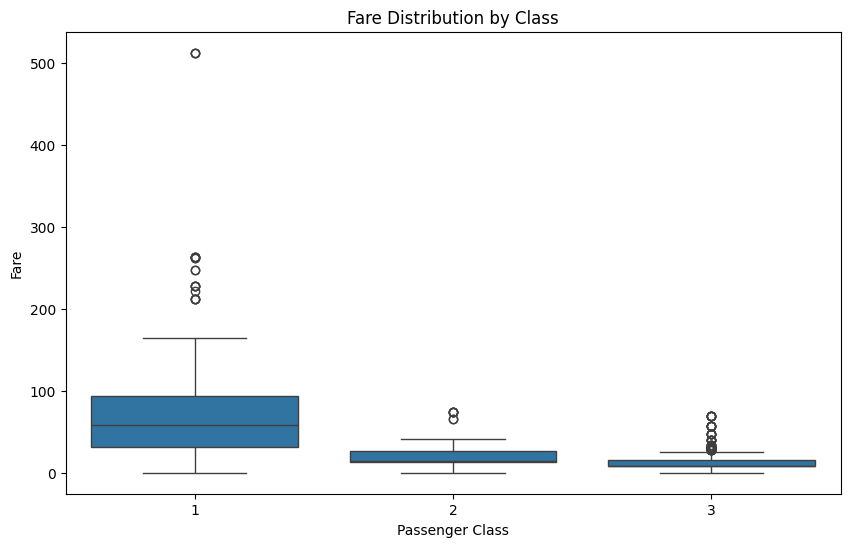

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=titanic)
plt.title('Fare Distribution by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

 -> The fare varies significantly across different classes. First-class passengers paid the highest fares, followed by second and third class.

#### Pair Plot of Selected Features

A pair plot helps visualize the relationships between multiple features.

c:\Python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


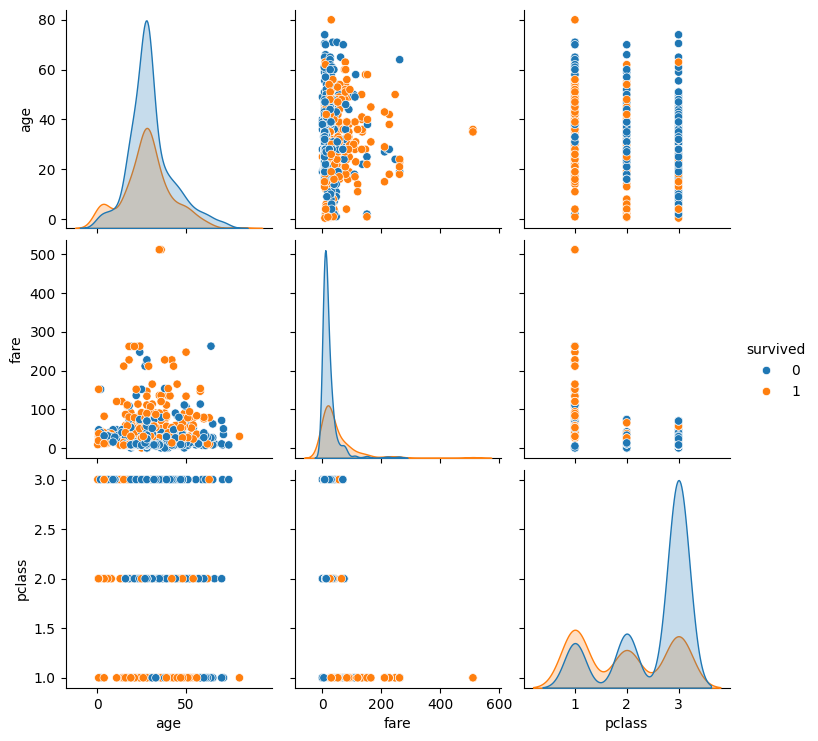

In [56]:
sns.pairplot(titanic[['age', 'fare', 'pclass', 'survived']], hue='survived')
plt.show()

 The pair plot shows relationships between age, fare, passenger class, and survival, highlighting how different features interact with each other and affect survival rates.

### Advanced Data Visualizations

#### Heatmap for Correlation

A heatmap can visualize the correlation matrix, showing the relationships between different numerical features.

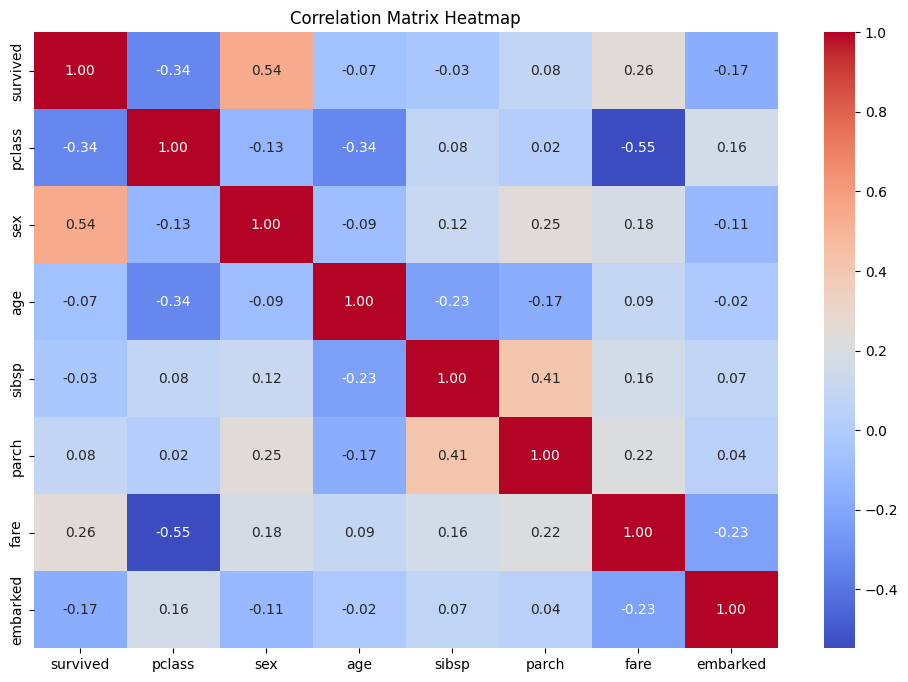

In [57]:
# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_titanic.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


The heatmap helps to identify features that have strong correlations with each other and with the target variable (survived). For instance, 'pclass' and 'fare' have a strong negative correlation, indicating that higher class tickets cost more.

#### Facet Grid of Survival Rate by Age and Sex

Facet grids allow you to create multiple subplots that show the relationship between two variables, separated by categories.


c:\Python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


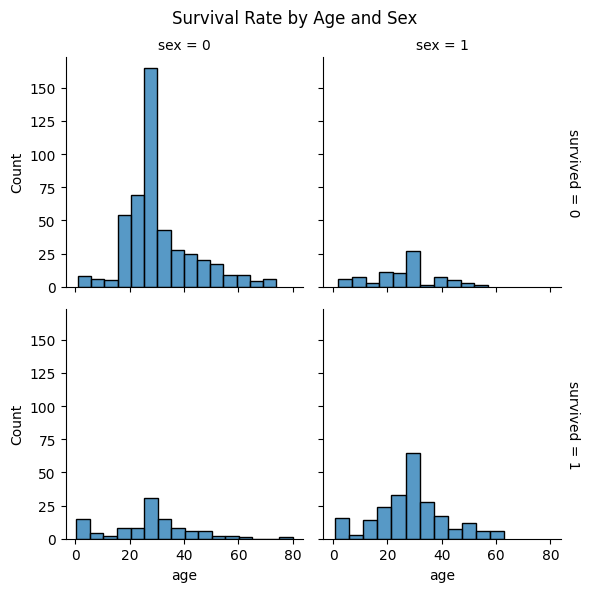

In [58]:
g = sns.FacetGrid(titanic, col="sex", row="survived", margin_titles=True)
g.map_dataframe(sns.histplot, x="age", binwidth=5)
g.fig.suptitle('Survival Rate by Age and Sex')
g.fig.subplots_adjust(top=0.9)
plt.show()

This visualization shows that younger passengers (children) had a higher survival rate, especially among females. Older male passengers had a lower survival rate.

#### Violin Plot of Fare by Passenger Class and Survival

Violin plots combine box plots and kernel density plots to provide a more detailed view of the data distribution.


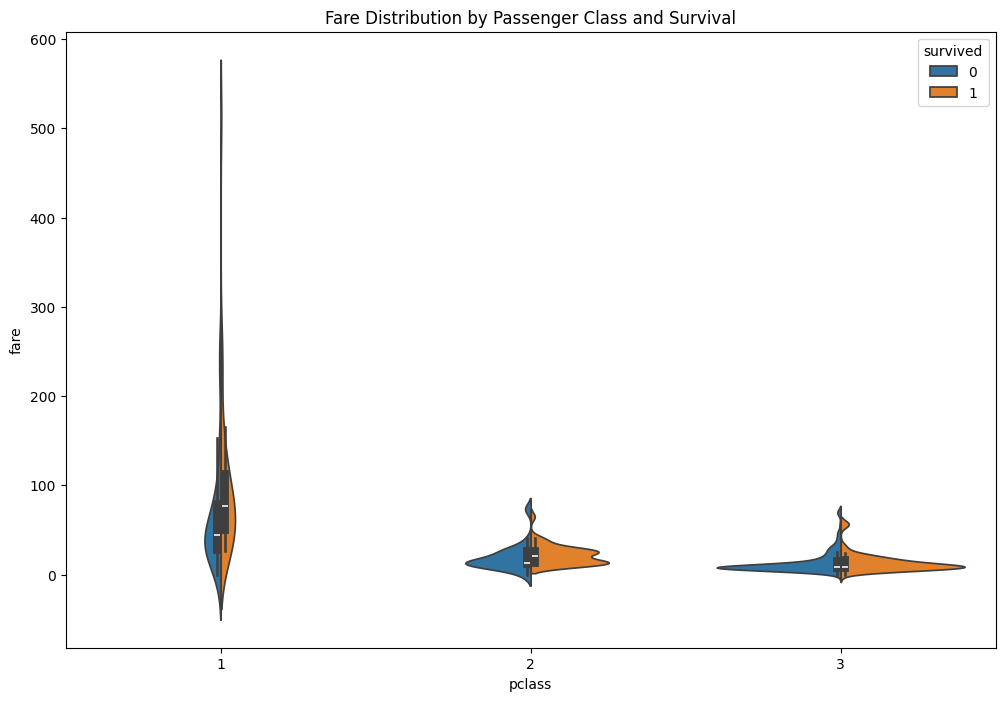

In [59]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='pclass', y='fare', hue='survived', data=titanic, split=True)
plt.title('Fare Distribution by Passenger Class and Survival')
plt.show()

The fare distribution shows that first-class passengers paid higher fares and had a higher survival rate. Third-class passengers paid lower fares and had a lower survival rate.

#### Pair Plot with Additional Variables

Adding more variables to a pair plot can reveal complex relationships.

c:\Python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


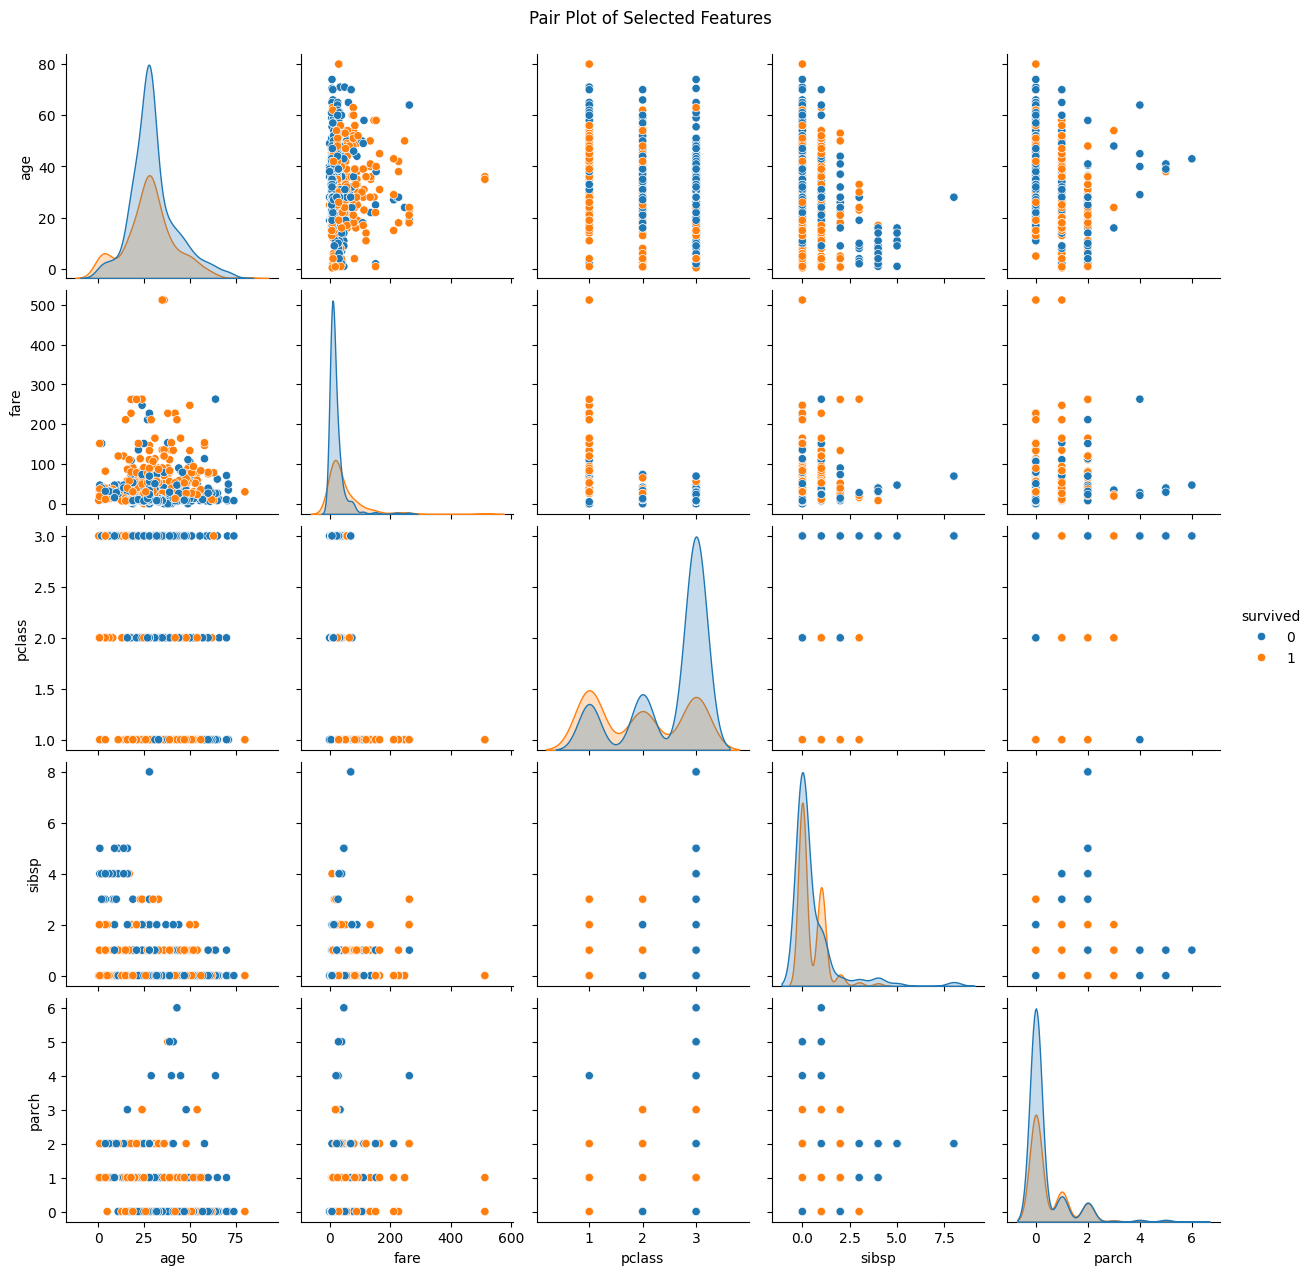

In [60]:
sns.pairplot(titanic[['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived']], hue='survived')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

The pair plot reveals how combinations of multiple features relate to survival. For example, younger passengers with higher fares (likely first class) had higher survival rates.

#### Swarm Plot of Age by Passenger Class and Survival

Swarm plots can show the distribution of a numerical variable while also highlighting categories.

c:\Python\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


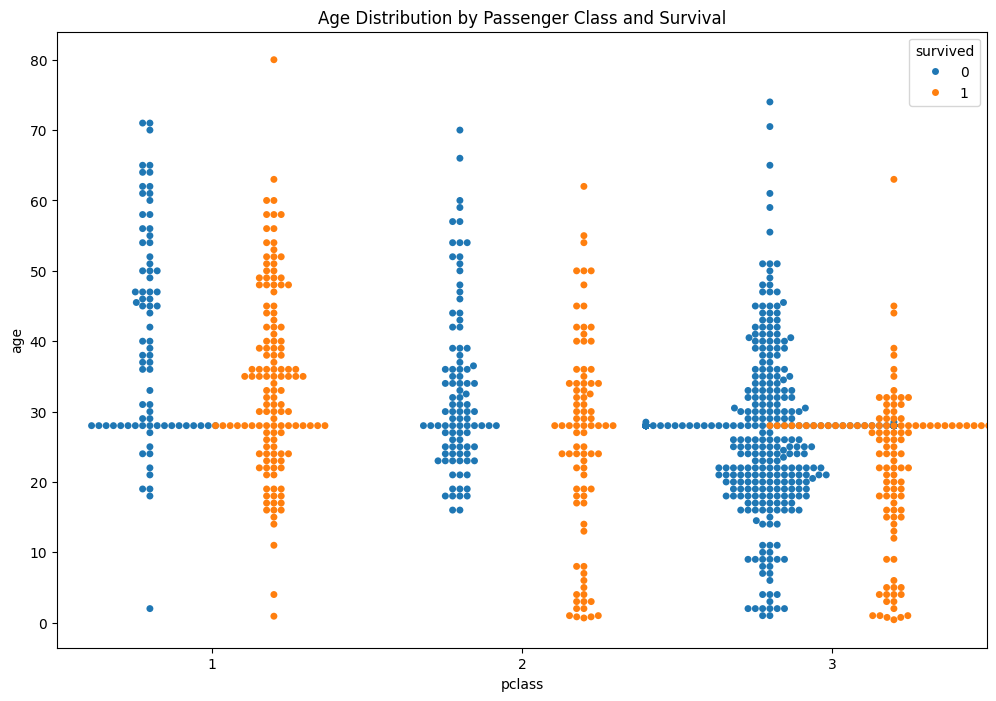

In [61]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='pclass', y='age', hue='survived', data=titanic, dodge=True)
plt.title('Age Distribution by Passenger Class and Survival')
plt.show()

This plot highlights the age distribution within each class and how it relates to survival. Younger passengers in first class had higher survival rates, while older passengers in third class had lower survival rates.

#### Catplot for Multiple Variables

Catplot (Categorical plot) allows you to visualize the relationship between multiple categorical variables and a numerical one.

c:\Python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


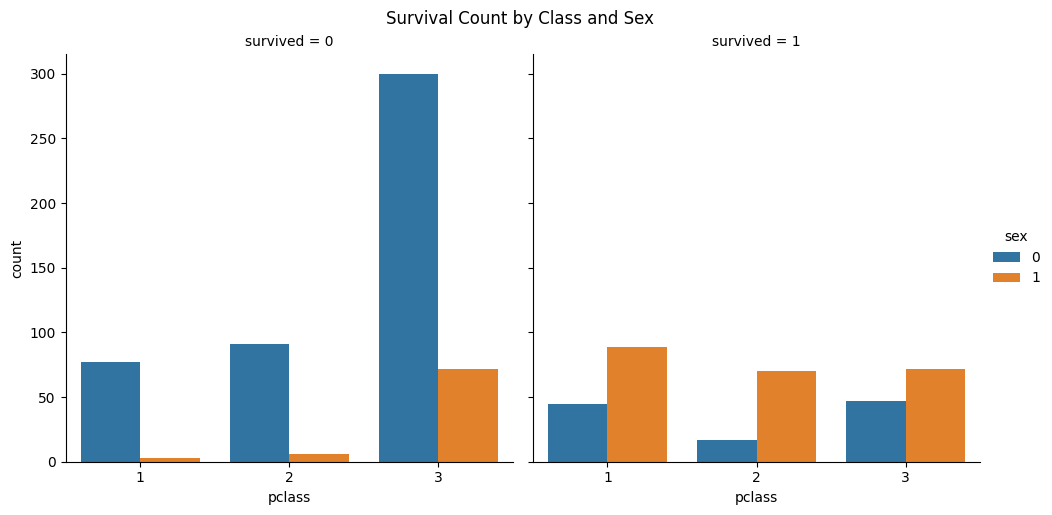

In [62]:
sns.catplot(x='pclass', hue='sex', col='survived', kind='count', data=titanic)
plt.suptitle('Survival Count by Class and Sex', y=1.02)
plt.show()

This plot shows the distribution of survivors and non-survivors across different classes and genders. It highlights that first-class females had the highest survival count.

#### KDE Plot for Density Estimation

KDE (Kernel Density Estimate) plots can show the probability density function of a continuous variable.

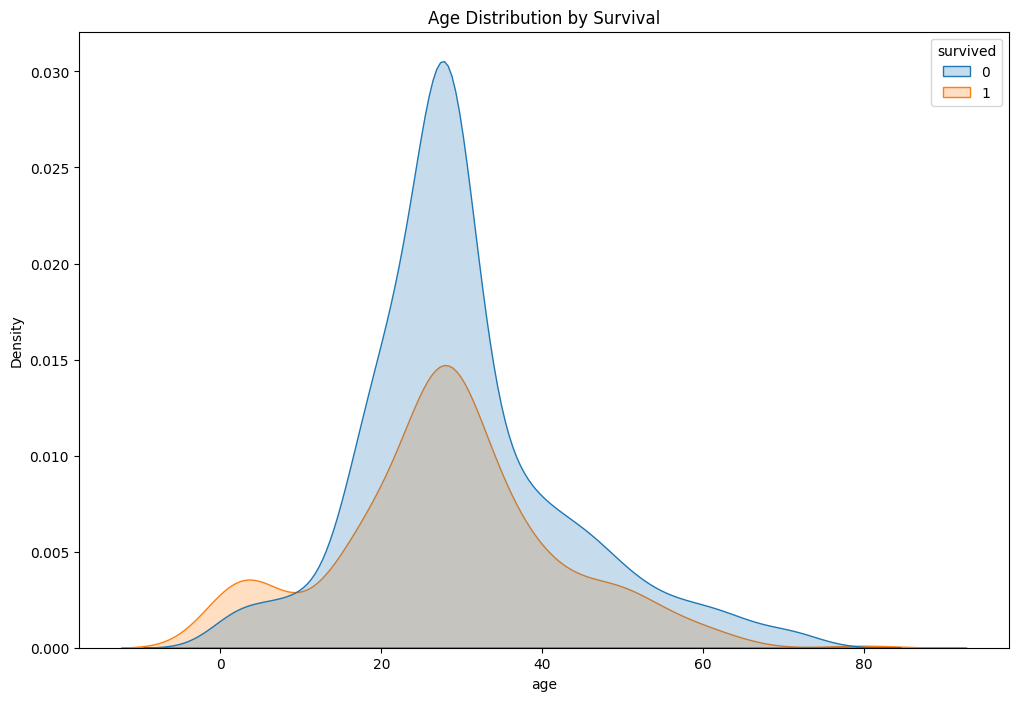

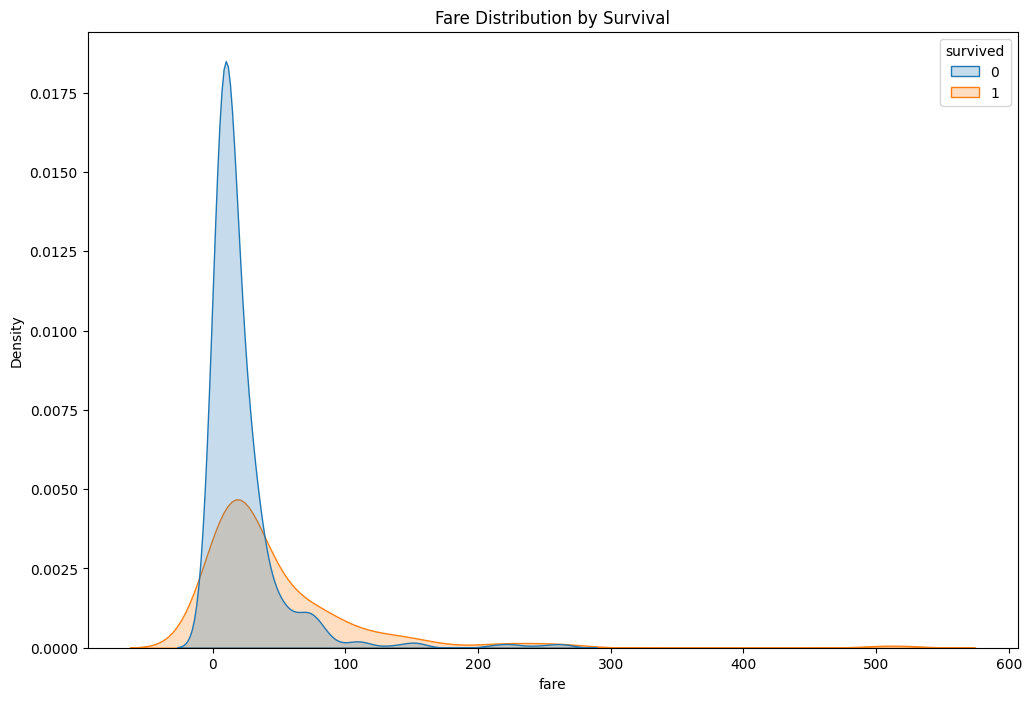

In [63]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=titanic, x='age', hue='survived', fill=True)
plt.title('Age Distribution by Survival')
plt.show()

plt.figure(figsize=(12, 8))
sns.kdeplot(data=titanic, x='fare', hue='survived', fill=True)
plt.title('Fare Distribution by Survival')
plt.show()

The KDE plot shows the density distribution of ages and fares for survivors and non-survivors. It reveals that younger passengers and those who paid higher fares had higher survival densities.

#### Joint Plot for Bivariate Analysis

Joint plots can visualize the relationship between two variables along with their marginal distributions.

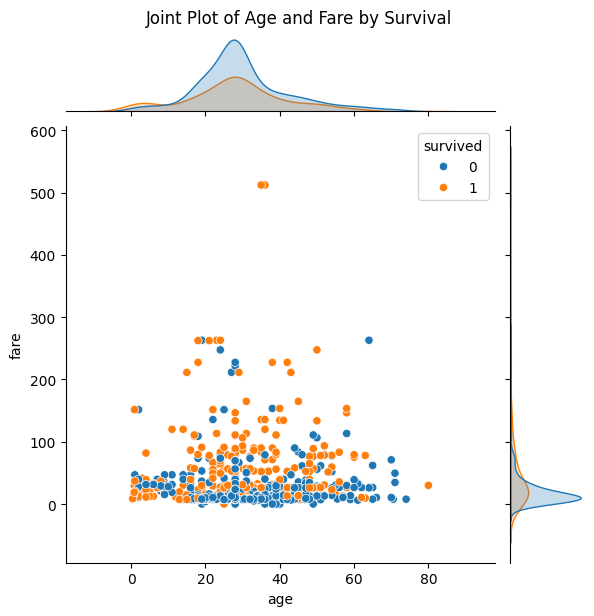

In [64]:
sns.jointplot(data=titanic, x='age', y='fare', hue='survived', kind='scatter')
plt.suptitle('Joint Plot of Age and Fare by Survival', y=1.02)
plt.show()

The joint plot shows the relationship between age and fare and how they correlate with survival. It highlights that higher fares and younger ages are associated with higher survival rates.

#### Boxen Plot for Distribution Analysis

Boxen plots provide a better visualization for large datasets, showing distributions beyond quartiles.

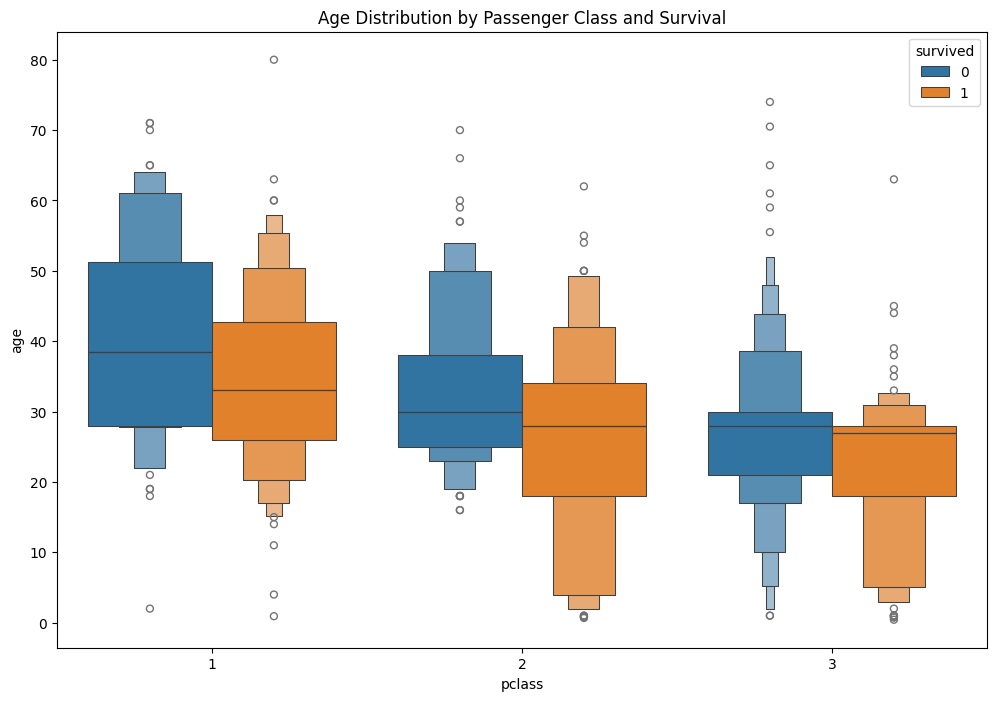

In [65]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x='pclass', y='age', hue='survived', data=titanic)
plt.title('Age Distribution by Passenger Class and Survival')
plt.show()

The boxen plot shows detailed distributions of age within each class and how they vary with survival. First-class passengers have a wider age range with higher survival rates, while third-class passengers are younger with lower survival rates.